In [2]:
# Import the important packages
import pandas as pd  # Library used for data manipulation and analysis

import numpy as np  # Library used for working with arrays

import matplotlib.pyplot as plt  # Library for visualization

import seaborn as sns  # Library for visualization

%matplotlib inline

import scipy.stats as stats  # This library contains a large number of probability distributions and a library of statistical functions

# Business Overview :

We want to know where the majority of revenue is coming from, so that we can continue to promote the top earnings restaruants and cuisine types. That way, our fee associated with our app brings in more money and the drivers also earn more money, so we can have a holistic eco-system amongst the App, the drivers, and the restaruants.

In [3]:
mydata = pd.read_csv('C:/Users/14342/Desktop/Debugging/foodhub_order.csv') #Loading data set 

mydata.head() #Display the first 5 rows of our data set

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
mydata.isnull() #check for missing values 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


In [5]:
mydata.info() #Summary of data / data type of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [6]:
mydata.describe() #Statistical summary of our data // mean, Standard deviation, minimum value, 1st percentile, 2ndpercentile, 3rd percentile of the columns with numeric values. Counts the number of variables in dataset


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [7]:
mydata.tail() #Display the last 5 rows our our dataset 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [8]:
df = pd.read_csv('C:/Users/14342/Desktop/Debugging/foodhub_order.csv') #turning data into a dataframe // won't change orginial dataset 

In [9]:
df.describe(exclude = 'number').T #Returns statistical summary of non numeric columns within the DataFrame

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [10]:
df.corr() #Correlation check across columns 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


In [31]:
# Making a list of all categorical variables 
cat_col = ['restaurant_name', 'cuisine_type', 'day_of_the_week']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    
    print('-' * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------


We can see that Shake Shack, The Meatball Shop, Blue Ribbon Sushi/Friend Chicken and Parm are the top 5 most ordered restaruants 

In [32]:
df.isna().sum() #sum of null values

restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [33]:
df.shape #display the dimesnions of our datset 

(1898, 7)

In [34]:
df.describe().T #statiscal summary 

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


In [15]:
df.describe(exclude = 'number').T #caregorical statistical sumamry 

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [16]:
df.value_counts() # Counting the frequency of unique values in the DataFrame 

order_id  customer_id  restaurant_name            cuisine_type  cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476547   83095        Bareburger                 American      6.84               Weekend          5          22                     24               1
1477807   38050        Blue Ribbon Sushi          Japanese      12.71              Weekday          Not given  24                     28               1
1477819   35309        Blue Ribbon Sushi          Japanese      25.22              Weekday          Not given  31                     24               1
1477818   144352       Shake Shack                American      22.36              Weekend          4          27                     27               1
1477817   335897       Sushi of Gari 46           Japanese      12.18              Weekday          4          24                     27               1
                                                                                       

Exploratory Data Analysis: Univariate Analysis

In [35]:
import seaborn as sns #Library for visualization
import numpy as np #Library used for working with arrays
import matplotlib.pyplot as plt # Library for visualization

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

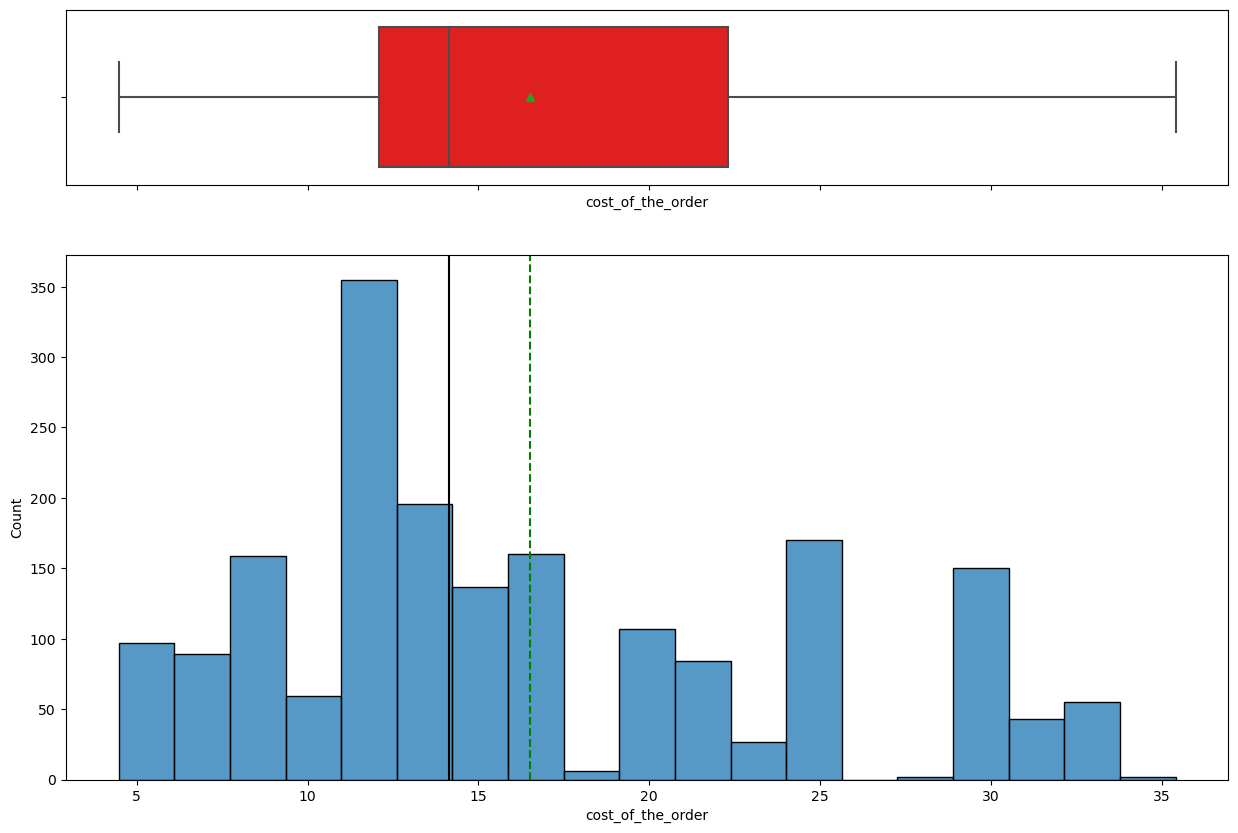

In [36]:
histogram_boxplot(df.cost_of_the_order)

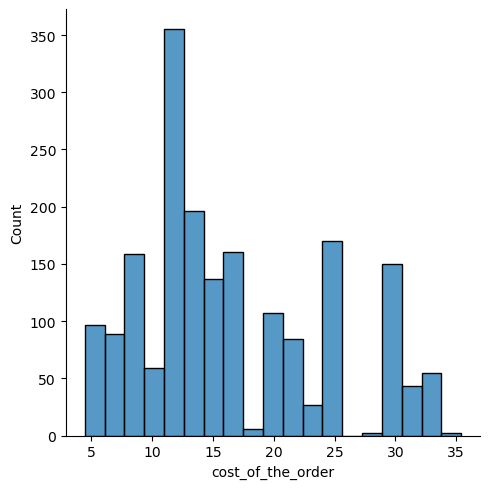

In [41]:
sns.displot(df.cost_of_the_order) #Another vway to view the same data.

Observations: 

Distribution from the Cost of the Order runs from $11-30.

The mean is around $16.

The distribution of the cost of orders is right-skewed.

The median cost is $11

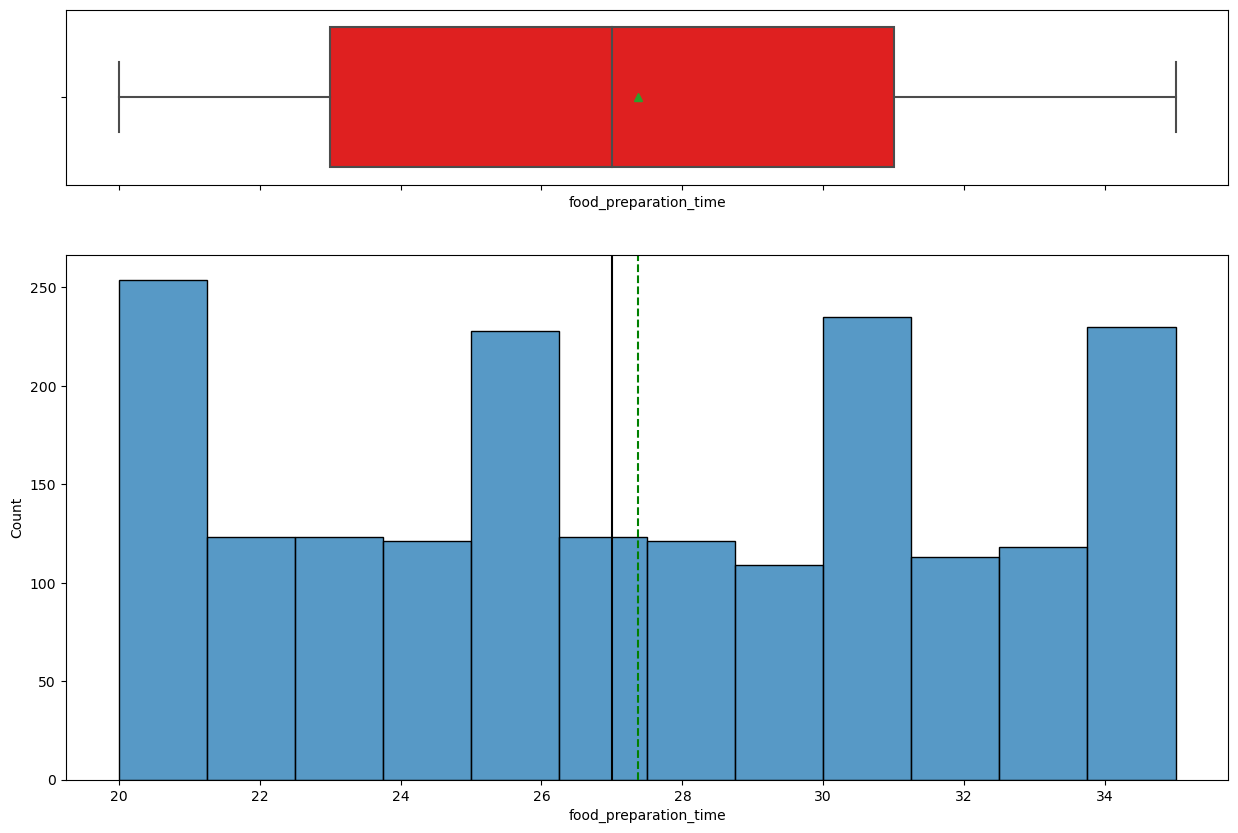

In [20]:
histogram_boxplot(df.food_preparation_time)

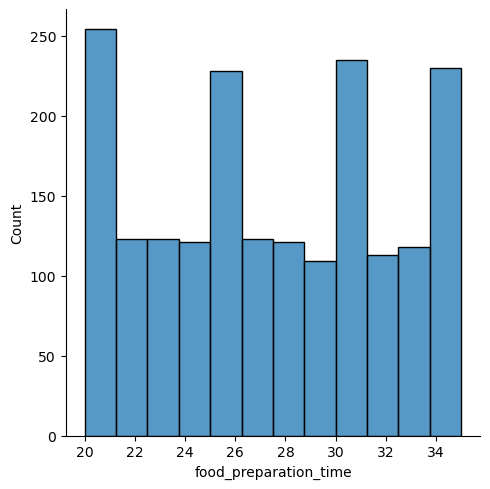

In [42]:
sns.displot(df.food_preparation_time)

Observations on Food Preparation Time

Food preparation time runs from 20 minutes to 35 minutes

The mean preparation time is 27.50 mintues and the median is 27 miinutes 

The distribution is relatively uniform with a slight right skew 


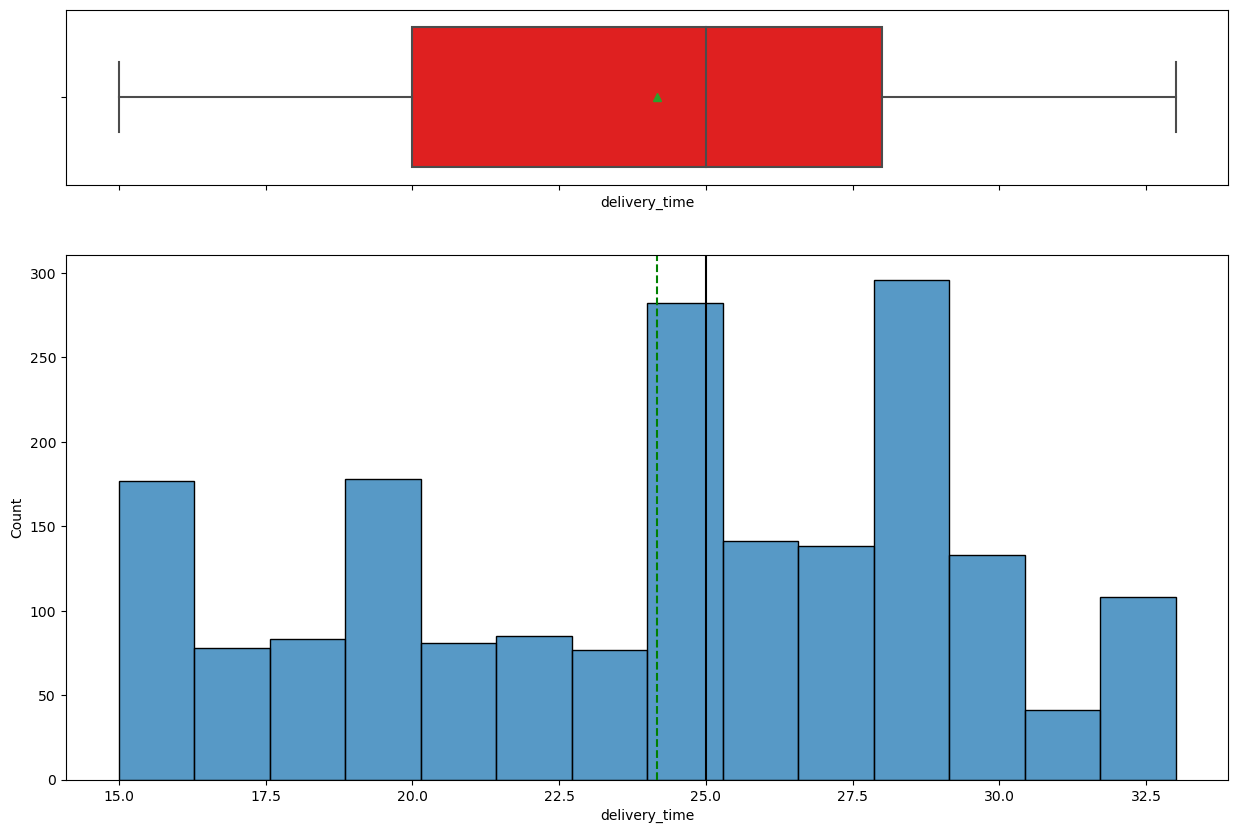

In [22]:
histogram_boxplot(df.delivery_time)

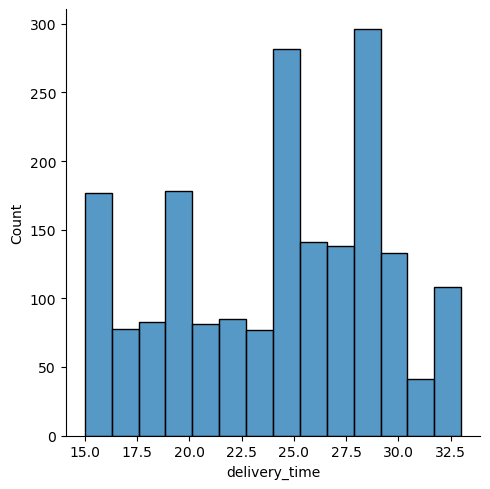

In [23]:
sns.displot(df.delivery_time)

Observations on Delivery Time

Delivery time runs from 15 minutes to 32.50 minutes

The mean delviery time is 25 mintues and the median is 24.50 miinutes 

The distribution is has a slight left skew

# Categorical Variables

In [24]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    
    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

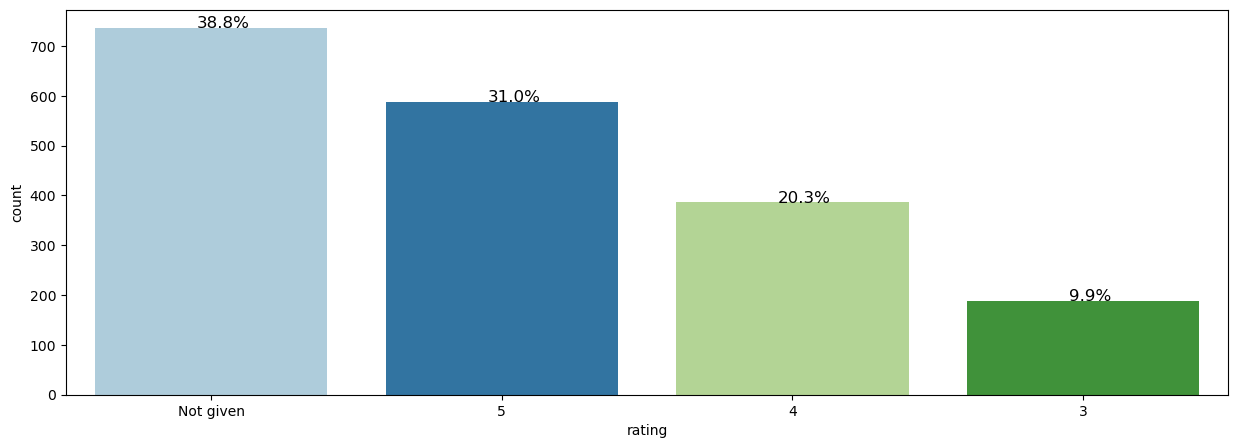

In [25]:
bar_perc(df, 'rating')

Observations

The majority of users do not leave a rating, follwed byt a sequential order of ratings from 5 down in decending order

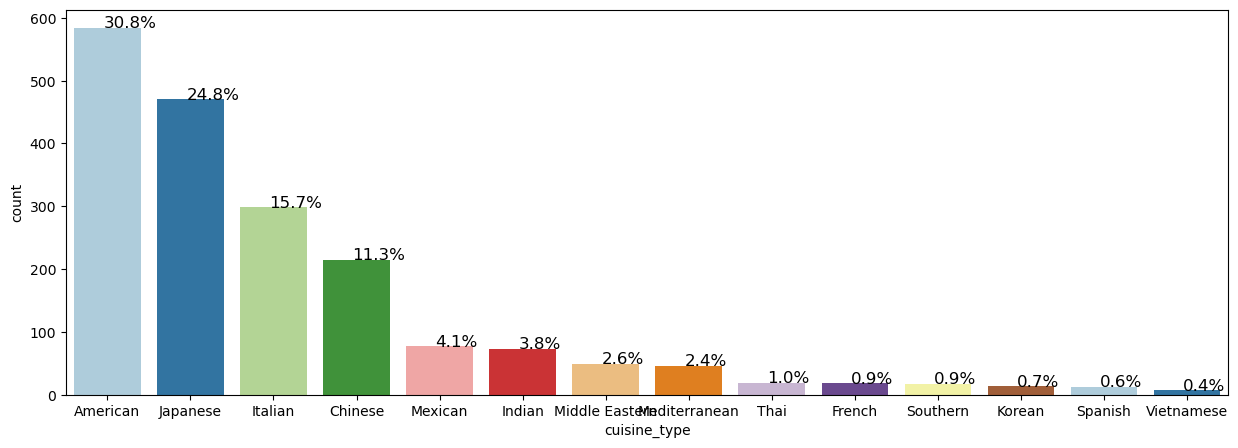

In [26]:
bar_perc(df, 'cuisine_type')

The Majority (55.6%) of the food comes from two Cuisine Types, American and Japanese 

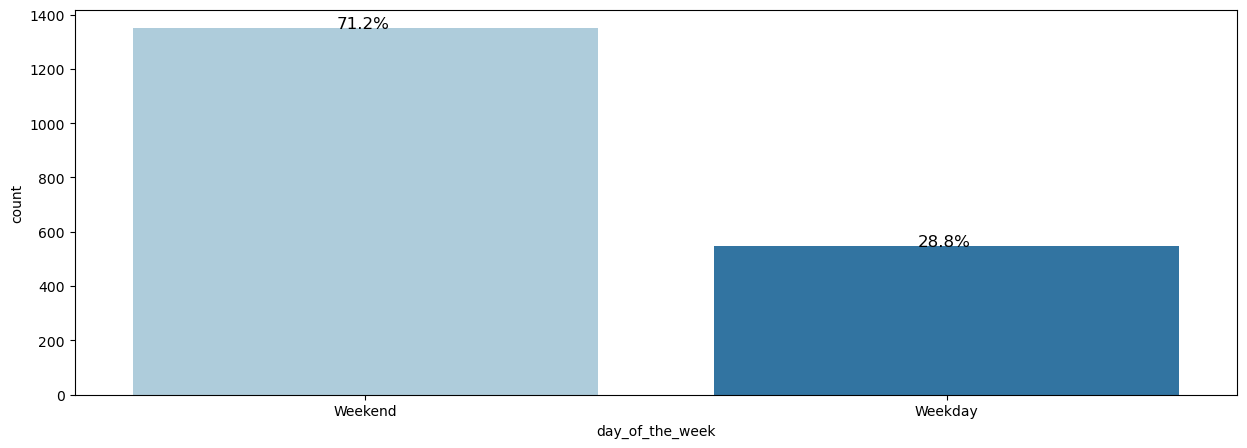

In [27]:
bar_perc(df, 'day_of_the_week')

71.2% of the food is ordered on the Weekend

# Multivariate Data Analysis

<AxesSubplot: >

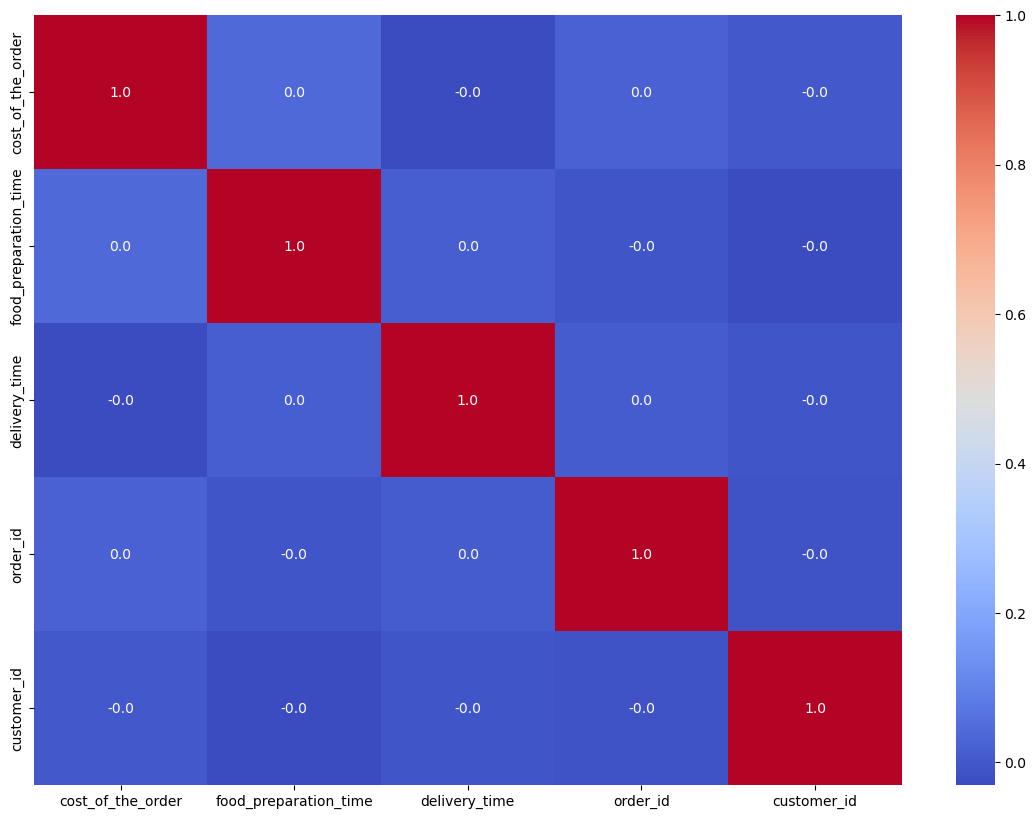

In [28]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order', 'food_preparation_time','delivery_time', 'order_id','customer_id']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = ".1f",            
        xticklabels = corr.columns,            
        yticklabels = corr.columns) #Displaying correlations // in this case no correlations 

Observations:

We seee that there are no correlations amongst the variables.

C:\temp\ipykernel_76552\2174251822.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x = "day_of_the_week", y = "cost_of_the_order", data = df, ci = 0, color = "RED", estimator = 'sum')


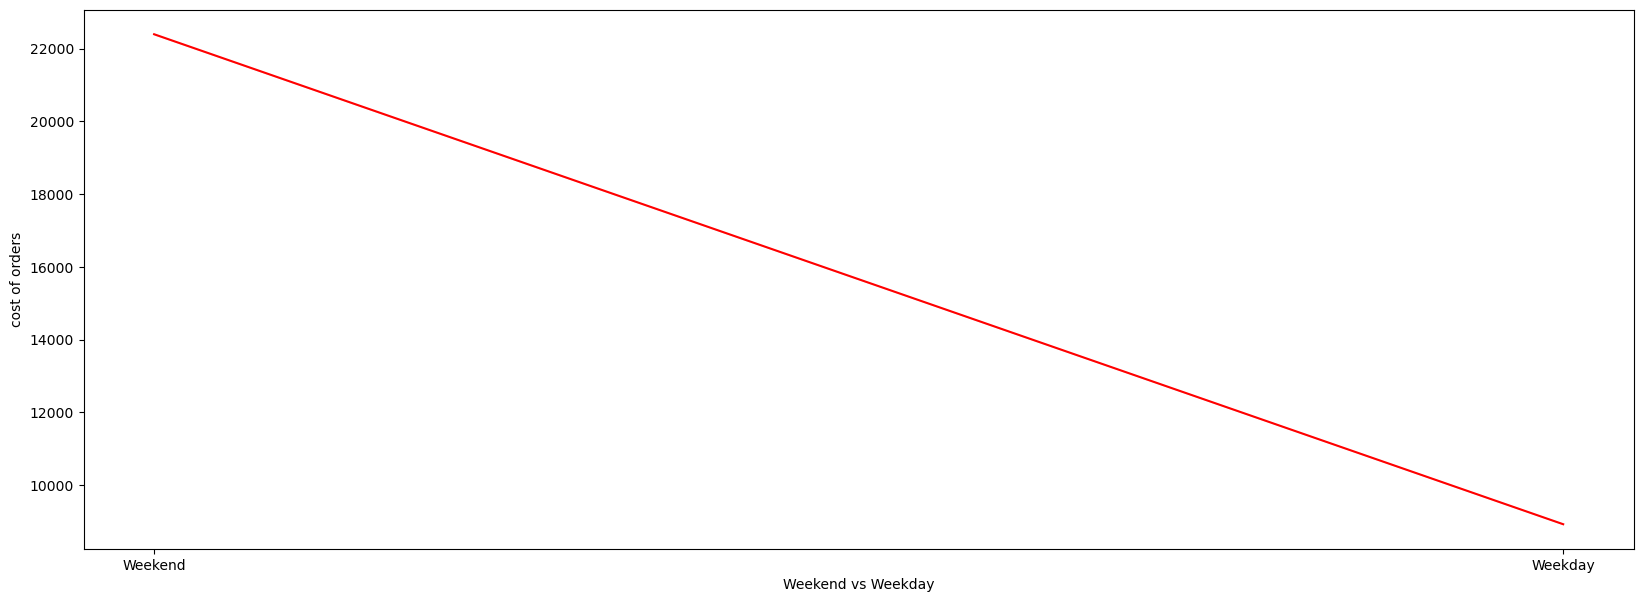

In [44]:
cats = df.day_of_the_week.unique().tolist()
df.day_of_the_week = pd.Categorical(df.day_of_the_week, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "day_of_the_week", y = "cost_of_the_order", data = df, ci = 0, color = "RED", estimator = 'sum')
plt.ylabel('cost of orders')
plt.xlabel('Weekend vs Weekday')
plt.show()
    

Observations:

We can see the majoirty of revenue is brough in on the weekend

C:\temp\ipykernel_76552\2123850329.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x = "cuisine_type", y = "cost_of_the_order", estimator = 'sum', ci = 0, data = df, color = "RED")


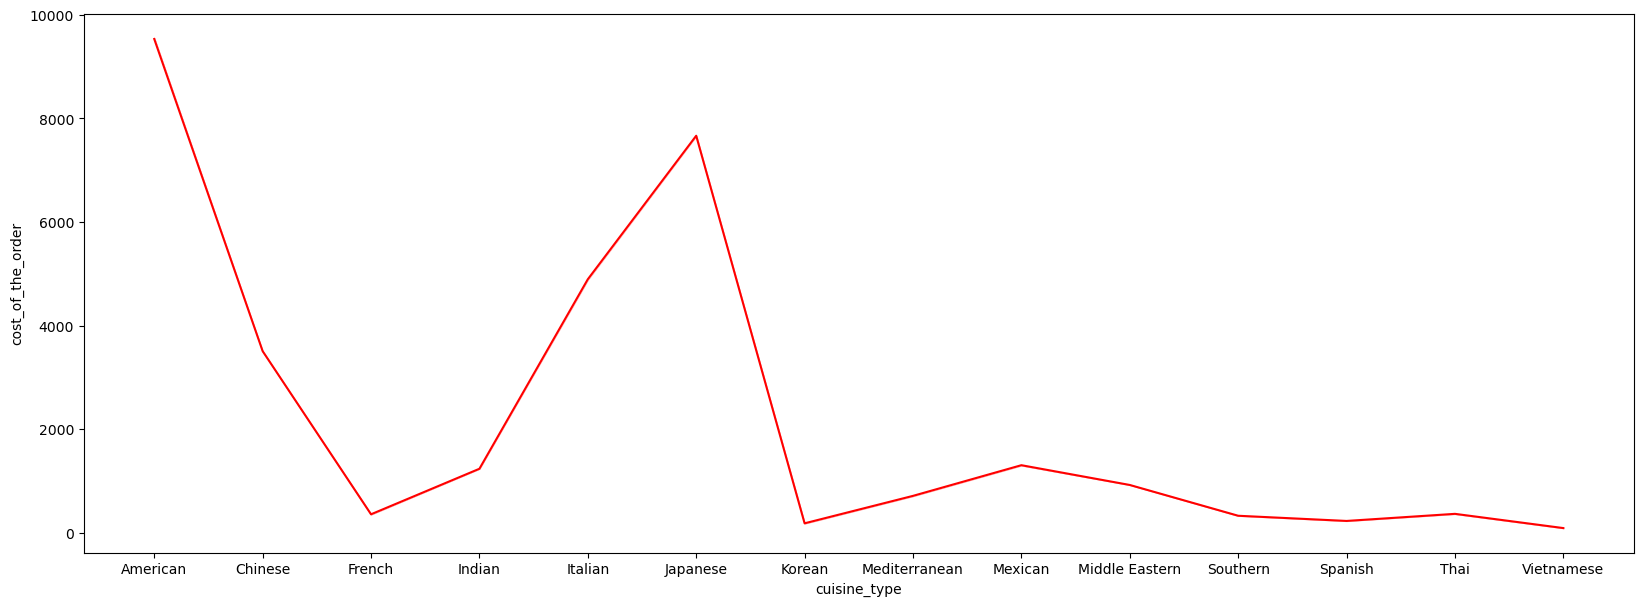

In [46]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "cuisine_type", y = "cost_of_the_order", estimator = 'sum', ci = 0, data = df, color = "RED")
plt.ylabel('cost_of_the_order')
plt.xlabel('cuisine_type')
plt.show()

Observations:

We can see that the cost of orders are highest for American and Japanse

In [51]:
top_restaurants = df.groupby('restaurant_name')['cost_of_the_order'].sum().nlargest(10)
print(top_restaurants)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64


Top 10 Restaurants by order costs

<Figure size 1400x1400 with 0 Axes>

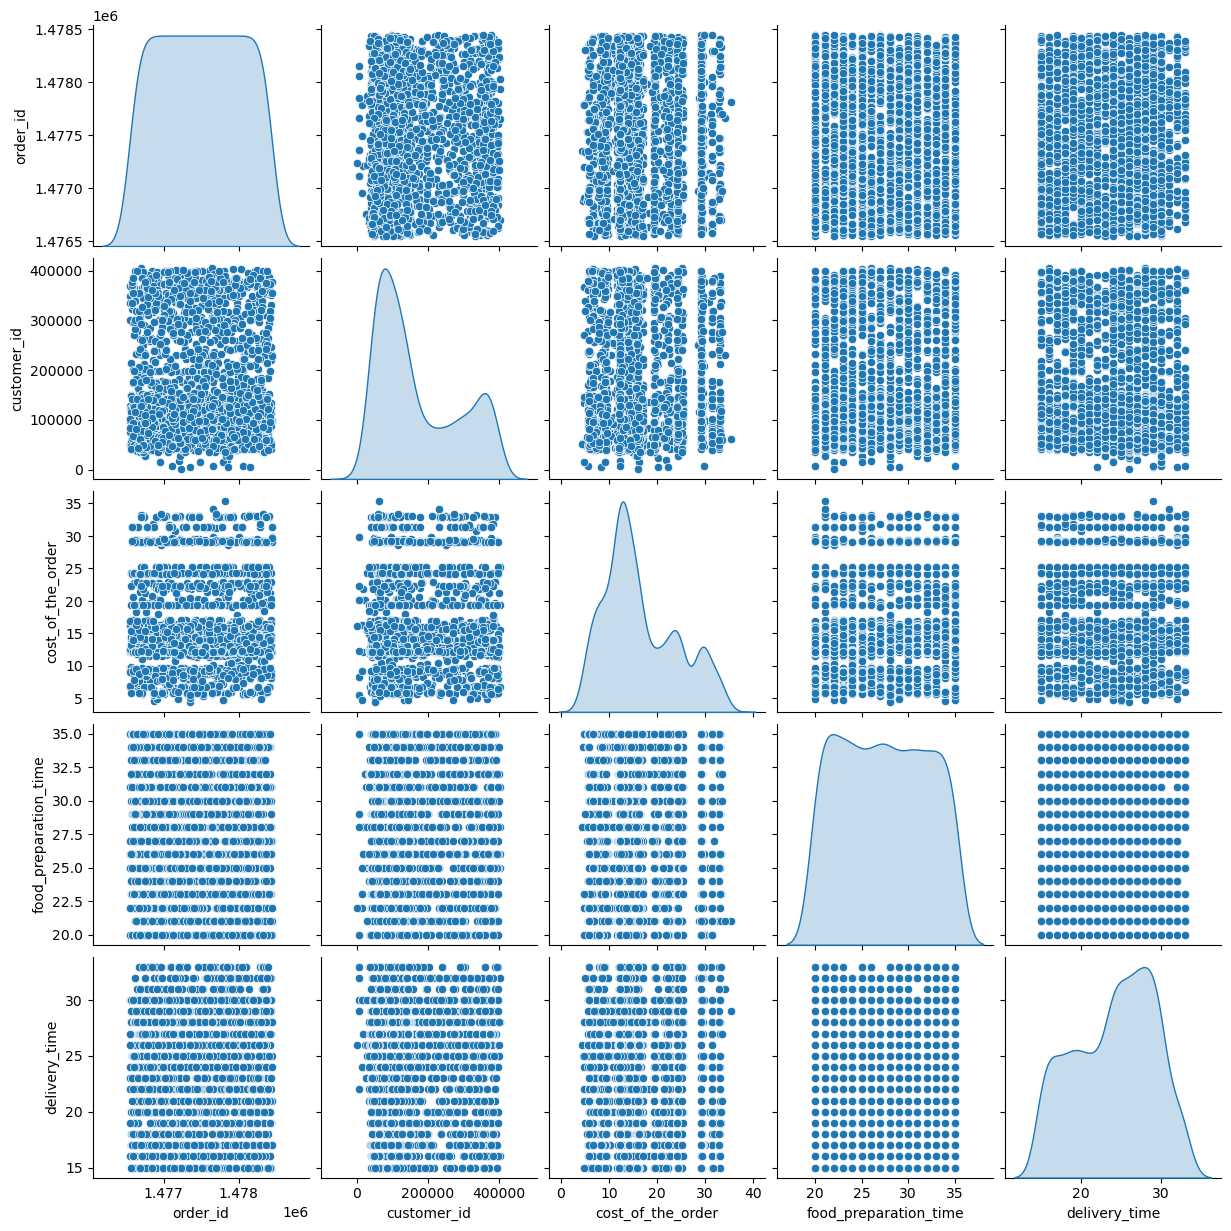

In [52]:
plt.figure(figsize=(14,14))
sns.pairplot(df, diag_kind='kde') #Another way to view correlations, or in this case lack of correlations

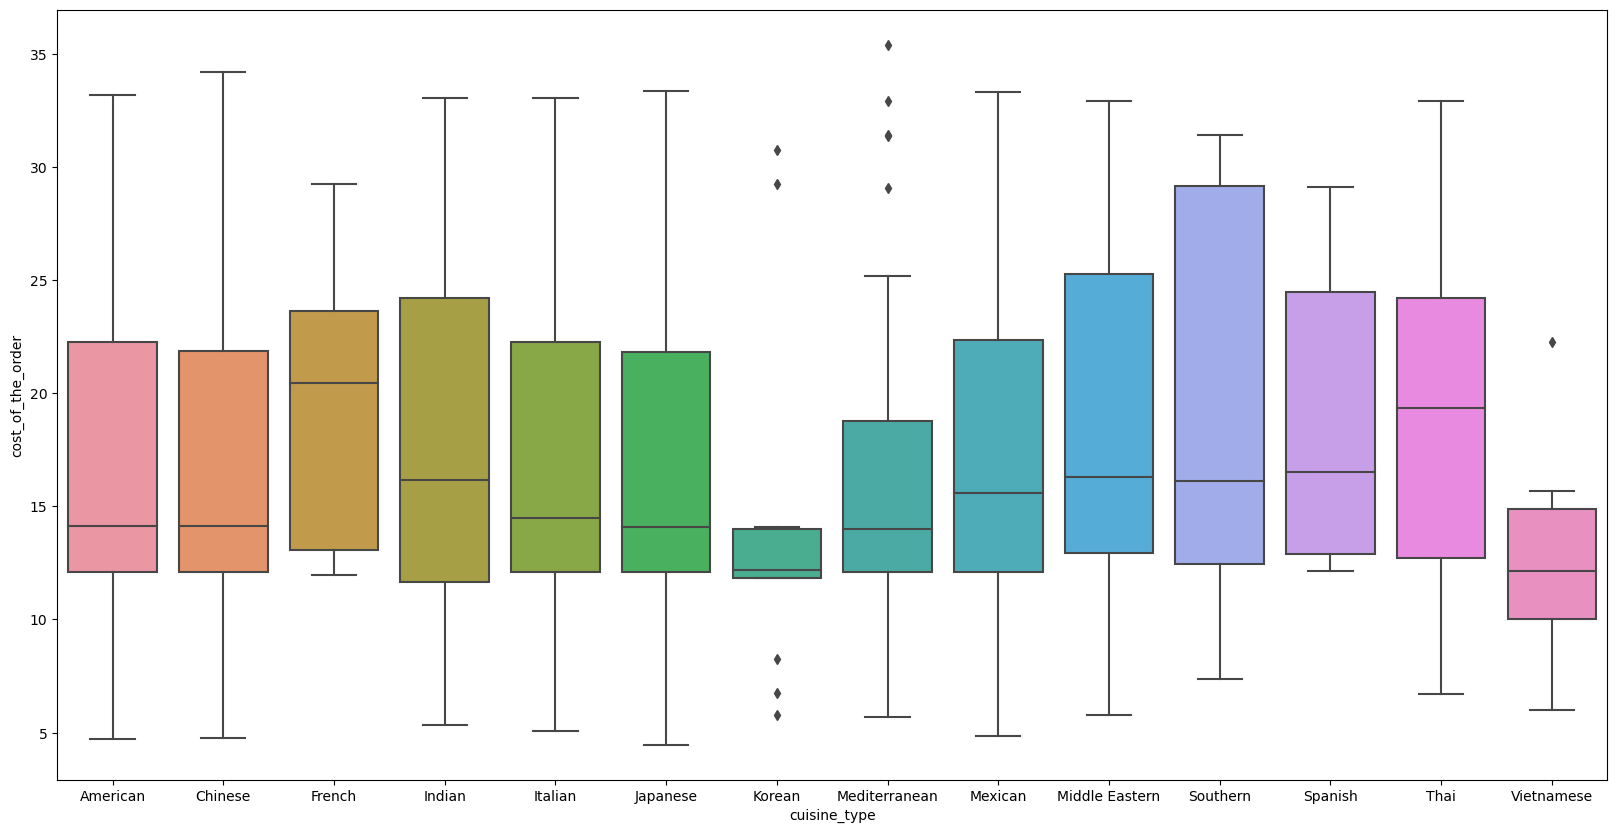

In [49]:
plt.figure(figsize = (20, 10))  
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.ylabel('cost_of_the_order')
plt.xlabel('cuisine_type')
plt.show()

#Conclustions: Weekends bring in the most amount of food and in 2 main categories. American and Japanese which account for 55.6% of all cuisine types.


Observations:

The costs are relatively similiar, being between $5-$35. Korean and Vietnamese cuisine sticks out as being cheaper, while the French and Spanish cusisine has a higher floor than the rest.

We can conclude that most people simply like the American / Japanese food options more given there is no large dicount on price, difference in preparation or delivery time.



Conclusion:
    
We analyzed a dataset of around 1898 orders from different restaurants and cuisines types. The main interest here is which restaruant and cusiine type is bringing in the most revenue. From a business perspective we would want to focus on our top performers and leave off the bottom earners to increase the amount of revenue generated. We can promote these restaurants / cuisine types to increase the volume of orders. We can see that there is no correlation amongst any of the categories within the data set.

1) Shake Shack is the number one earning restaurnt. Followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm      
2) The two top earning Cuisine Categories are American and Japanese which account for 55.6% of all orders.
3) 71.2% of food is ordered on the Weekends
4) Contrary to intution, delivery time and food preparation time have no signficance in the total number of orders generated.
5) We do not know the distance from a customer to a given restaruant. Are the top grossing restaurants in a more densely populated area? 
6) We do not know if the particular restuarants are running any discount specials

# Recommendations to business 

1)Focus on promoting the restaurants that bring in the most orders.

2)Focus on promoting the top earning cuisine types (this way you spread the net you cast on deal specials or discounts)

3)Run promotions on Weekends vs weekdays given the demand is exponentially greater

4)Obtain more data on population density to the proximity of customers 